# Desafio 4

In [1]:
import re
import pandas as pd
import numpy as np
import missingno as msngo
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec

pd.options.display.max_columns = None

## Pregunta 1

Realizar un análisis exhaustivo de calidad de datos para identificar y tratar posibles valores faltantes, valores atípicos y errores en los datos. Garantizar que el conjunto de datos esté limpio y preparado para su posterior procesamiento y entrenamiento de los modelos.

In [2]:
df = pd.read_excel('Data/ramen-ratings.xlsx')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


No se tienen variables numericas utiles en el dataset en el estado actual, se dropea la columna Review ya que es un ID y no tiene utilidad para el analisis 

In [4]:
df.drop(columns=['Review #'], inplace=True)

### Analisis de valores nulos

<Axes: >

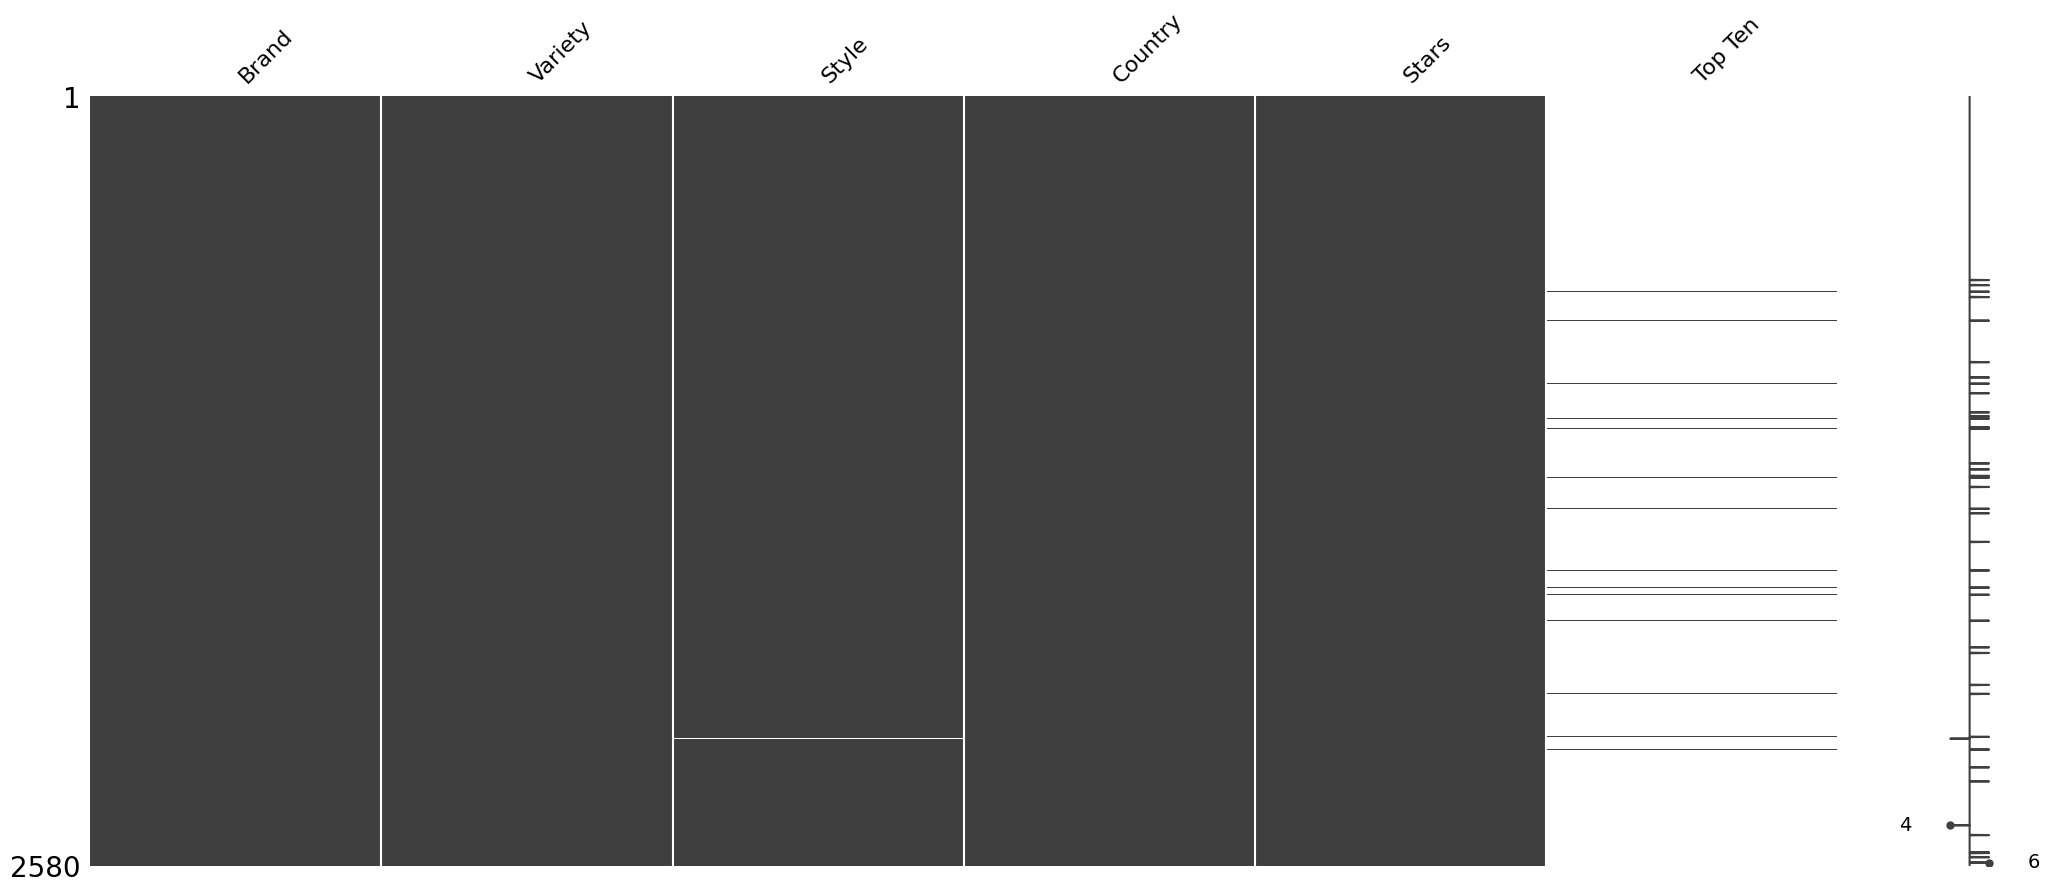

In [5]:
msngo.matrix(df)

Se observan algunos valores nulos en Style y muchos nulos en Top Ten, vamos a analizar estas columnas

En la columnas Style se tienen solo estos dos valores nulos, dado esto se procedera a eliminar

In [6]:
df[pd.isna(df.Style)]

,Brand,Variety,Style,Country,Stars,Top Ten
2152,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [7]:
df[pd.notna(df['Top Ten'])]

,Brand,Variety,Style,Country,Stars,Top Ten
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
673,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
752,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9
891,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7
942,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
963,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
995,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1059,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9


En la columna Top Ten se observan varios valores '/n' que no tienen sentido para la columna, estos se eliminarán
Adicional, se deduce que la columna contiene informacion si en algun año el ramen a salido como top ten, esto se procederá a cambiar por una columna booleana que solo diga si a salido dentro del topten en algun momento

In [8]:
df['Premiated'] = df['Top Ten'].apply(lambda x: False if pd.isna(x) or x == '\n' else True)
df.drop(columns=['Top Ten'], inplace=True)

La columna Stars entrega informacion sobre la puntuacion que se obtuvo con el plato, esto se convertira en una variable numerica para su analisis

In [9]:
print(df.Stars.unique())

[3.75 1 2.25 2.75 4.75 4 0.25 2.5 5 4.25 4.5 3.5 'Unrated' 1.5 3.25 2 0 3
 0.5 3.8 4.3 2.3 3.3 1.75 0.75 1.25 1.1 2.1 0.9 3.1 4.125 3.125 2.125 2.9
 0.1 2.8 3.7 3.4 3.6 2.85 3.2 3.65 1.8]


In [10]:
df[df.Stars == 'Unrated']

,Brand,Variety,Style,Country,Stars,Premiated
32,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,False
122,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,False
993,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,False


Al obtener los diferentes valores de columna nos damos cuenta que adicional a los numeros tambien tiene valores 'Unrated', estos valores se eliminarán ya que son 3 valores solamente

In [11]:
df  = df[(df.Stars != 'Unrated') & (pd.notna(df.Style))]
df = df.astype({'Stars': 'float64'})
print(f'Shape = {df.shape}')
df.head()

Shape = (2575, 6)


,Brand,Variety,Style,Country,Stars,Premiated
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,False
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,False
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,False
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,False
4,Ching's Secret,Singapore Curry,Pack,India,3.75,False


### Distribucion de variable categoricas

In [12]:
def display_categorical_variables(df, column):
    df['Count'] = 1
    aux = df.groupby(column).count()
    categories = len(df[column].unique())
    alt = categories / 3 if categories > 15 else 5 if categories < 5 else categories 
    fig, ax = plt.subplots(1,2, figsize=(15, alt))
    fig.subplots_adjust(left=None, bottom=None,  right=None, top=None, wspace=None, hspace=None)
    fig.suptitle(f'Distribucion de datos de columna {column}')
    fig.patch.set_visible(True)
    ax[0].axis('off')
    ax[0].axis('tight')
    ax[0].table(cellText=[[x] for x in aux.Count], colLabels=['Cantidad de datos'], rowLabels=list(aux.index), loc='center')
    ax[1].bar(list(aux.index), aux.Count)
    ax[1].set_ylabel('Cantidad de datos')
    ax[1].set_xlabel(column)
    plt.xticks(rotation='vertical')
    fig.tight_layout()
    df.drop(columns=['Count'], inplace=True)
    plt.show()

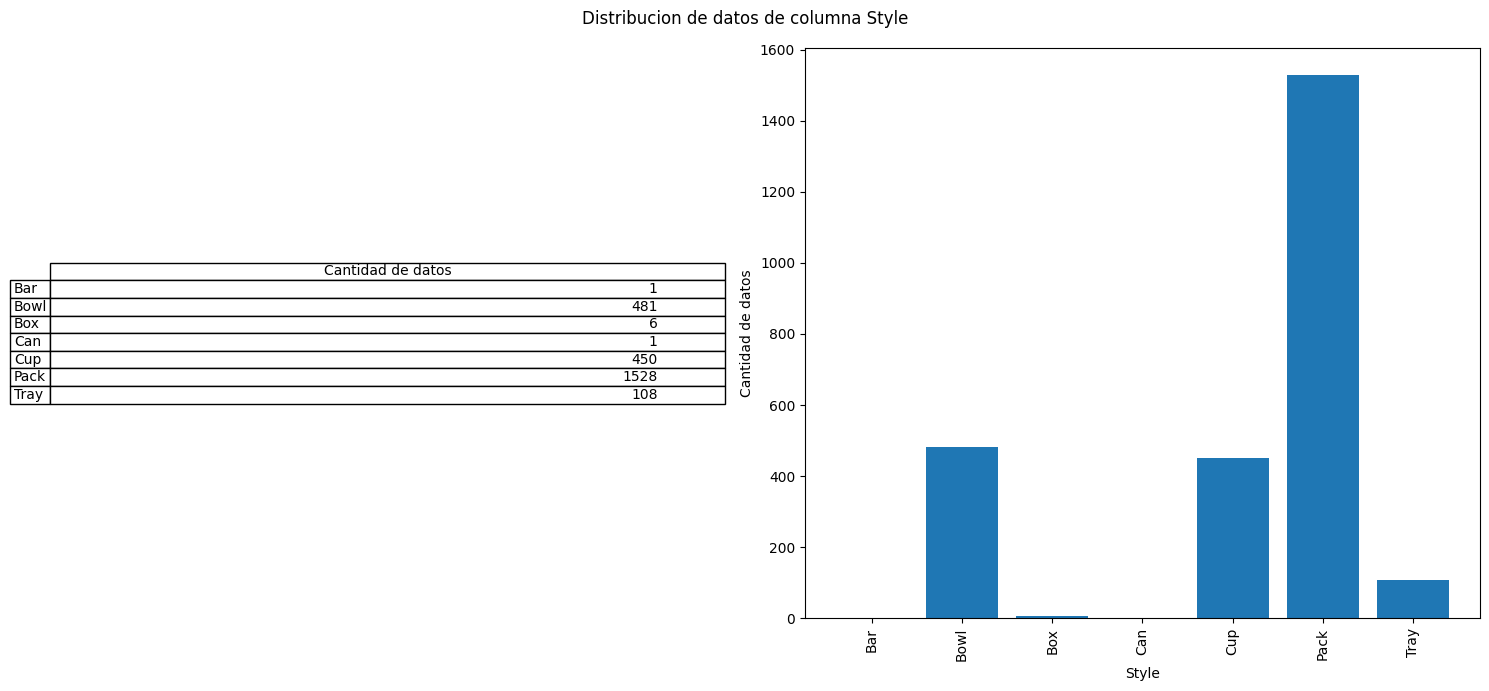

In [13]:
display_categorical_variables(df, 'Style')

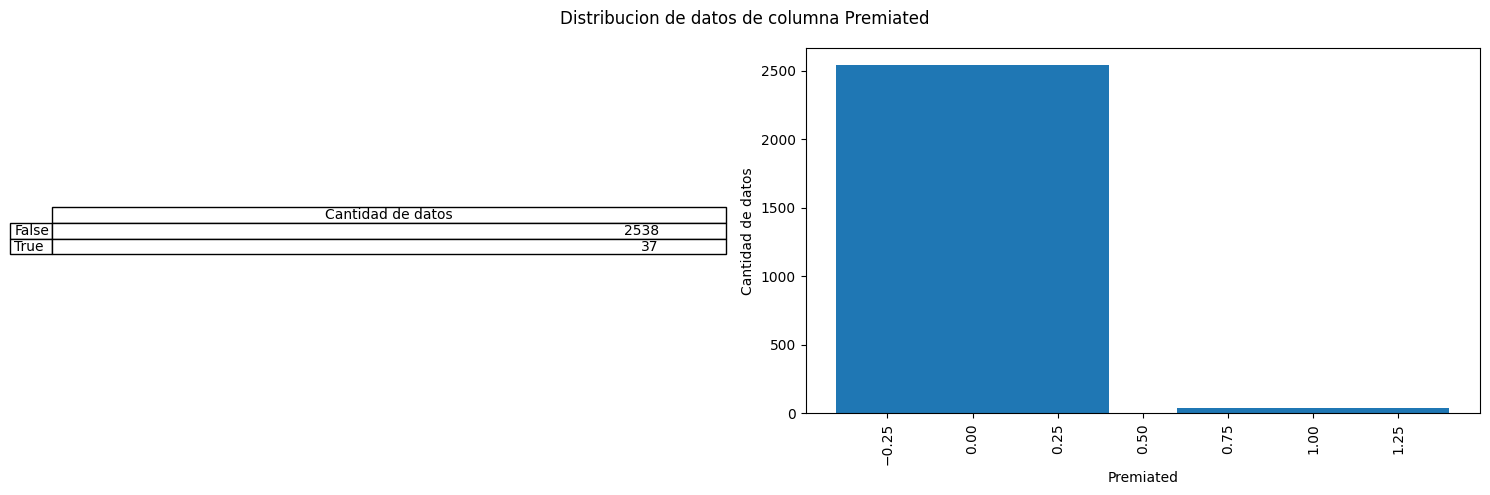

In [14]:
display_categorical_variables(df, 'Premiated')

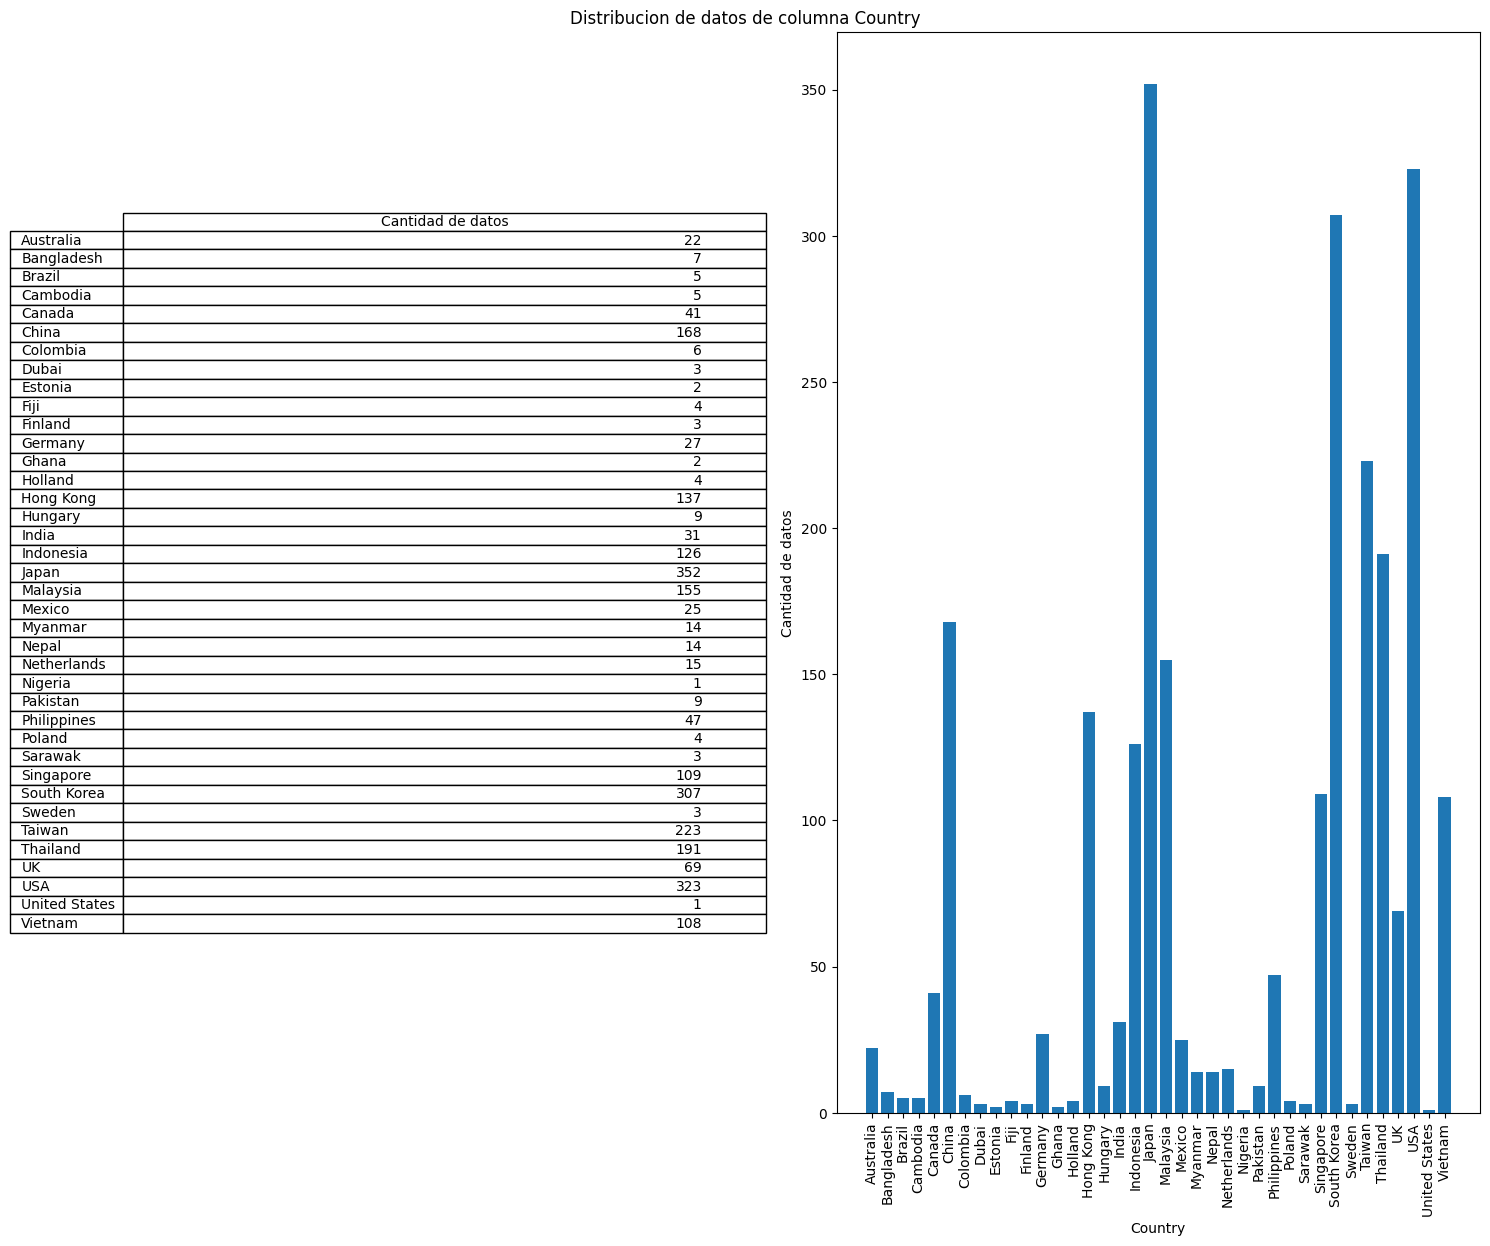

In [15]:
display_categorical_variables(df, 'Country')

Dado que se tienen puntajes de las preparaciones y no una columna que diga si es bueno o malo, se examinarán los valores de la columna Stars para definir desde que evaluacion es bueno.

Mean = 3.6548932038834945


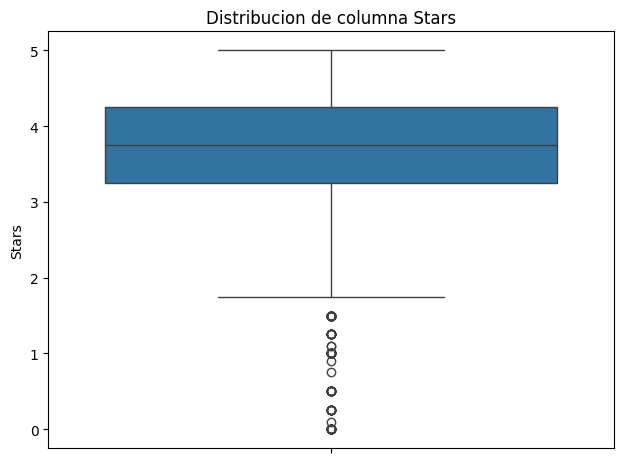

In [16]:
plt.title('Distribucion de columna Stars')
sns.set(style='whitegrid')
sns.boxplot(y=df.Stars, data=df)
plt.ylabel('Stars')
plt.tight_layout()
print(f'Mean = {df.Stars.mean()}')

Las columnas Brand y Country las convertiremos dummies, pero primero pondremos todo en minusculas y retiraremos simbolos no alfanumericos

## Pregunta 2
Realizar el preprocesamiento de los datos, incluyendo la normalización o estandarización de las características, codificación de variables categóricas y división del conjunto de datos en conjuntos de entrenamiento y prueba.

Ya que la media es 3.6, consideraremos que todos los valores sobre 3.7 son platos 'buenos'.

Con esto hecho dropeamos la columna Stars

In [17]:
df['Good'] = df.Stars.apply(lambda x: 1 if x > 3.5 else 0)
df.drop(columns = 'Stars', inplace=True)
df.head(10)

,Brand,Variety,Style,Country,Premiated,Good
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,False,1
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,False,0
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,False,0
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,False,0
4,Ching's Secret,Singapore Curry,Pack,India,False,1
5,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,False,1
6,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,False,1
7,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,False,1
8,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,False,0
9,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,False,0


In [18]:
def normalize_text(text):
    text = re.sub('[^0-9a-zA-Z ]+', '', text)
    text = re.sub('[ ]+', '_', text)
    return text.lower()

for col in ['Brand', 'Style', 'Country']:
    df[col] = df[col].apply(normalize_text)
df['Variety'] = df['Variety'].apply(lambda x: re.sub('[^0-9a-zA-Z ]+', '', x.lower()))

In [19]:
df_dummy = df.copy()

for col in ['Brand', 'Style', 'Country']:
    one_hot = pd.get_dummies(df_dummy[col], prefix=col.lower())
    df_dummy = df_dummy.drop(columns=col)
    df_dummy= df_dummy.join(one_hot)
df_dummy.head()

,Variety,Premiated,Good,brand_1_to_3_noodles,brand_7_select,brand_7_selectnissin,brand_a1,brand_abc,brand_acecook,brand_adabi,brand_ah_lai,brand_ajinatori,brand_amianda,brand_amino,brand_annie_chuns,brand_aone,brand_aroi,brand_asha_dry_noodle,brand_asia_gold,brand_asian_thai_foods,brand_authentically_asian,brand_azami,brand_baijia,brand_baixiang_noodles,brand_baltix,brand_bamee,brand_batchelors,brand_binh_tay,brand_bon_go_jang,brand_bonasia,brand_boss,brand_campbells,brand_cap_atoom_bulan,brand_carjen,brand_chaudharys_wai_wai,brand_chencun,brand_chering_chang,brand_chewy,brand_chikara,brand_china_best,brand_chings_secret,brand_chorip_dong,brand_choripdong,brand_choumama,brand_chuan_wei_wang,brand_cintan,brand_cj_cheiljedang,brand_conimex,brand_crystal_noodle,brand_curry_prince,brand_daddy,brand_daifuku,brand_daikoku,brand_daraz,brand_deshome,brand_doll,brand_dongwon,brand_dr_mcdougalls,brand_dragonfly,brand_dream_kitchen,brand_eat_go,brand_econsave,brand_emart,brand_emi,brand_ezee,brand_fantastic,brand_farmers_heart,brand_fashion_food,brand_fashion_foods,brand_fmf,brand_foodmon,brand_forest_noodles,brand_fortune,brand_four_seas,brand_fu_chang_chinese_noodle_company,brand_fuji_mengyo,brand_fujiwara,brand_fuku,brand_gaga,brand_gau_do,brand_gefen,brand_gge,brand_global_inspiration,brand_goku_uma,brand_gokuuma,brand_golden_mie,brand_golden_wheat,brand_golden_wonder,brand_gomex,brand_good_tto_leu_foods,brand_great_value,brand_greenoodle,brand_gs25,brand_guava_story,brand_haioreum,brand_hankow,brand_hans_south_korea,brand_hao_way,brand_happy_cook,brand_happy_family,brand_healtimie,brand_higashi,brand_higashimaru,brand_himyon,brand_homyeondang,brand_hosoonyi,brand_hsin_tung_yang,brand_hua_feng,brand_hua_feng_noodle_expert,brand_ibumie,brand_iburamen,brand_ica,brand_ikeda_shoku,brand_imee,brand_indomie,brand_inoodle,brand_ishimaru,brand_itomen,brand_itsuki,brand_jackpot_teriyaki,brand_jfc,brand_jingqi,brand_jj,brand_jml,brand_just_way,brand_kabuto_noodles,brand_kailo,brand_kamfen,brand_kang_shi_fu,brand_katoz,brand_kiki_noodle,brand_kim_ve_wong,brand_kims_bowl,brand_kimura,brand_kindee,brand_knorr,brand_koh_thai,brand_koka,brand_kolee,brand_komforte_chockolates,brand_koyo,brand_kumamoto,brand_kuriki,brand_la_fonte,brand_la_moderna,brand_lee_fah_mee,brand_lele,brand_liang_cheng_mai,brand_lipton,brand_lishan,brand_lishan_food_manufacturing,brand_little_cook,brand_liu_quan,brand_long_jun_hang,brand_long_kow,brand_lotus_foods,brand_love_cook,brand_lucky_me,brand_maggi,brand_maitri,brand_mama,brand_mama_pats,brand_mamee,brand_maruchan,brand_marutai,brand_master_kong,brand_mee_jang,brand_menraku,brand_mensunaoshi,brand_mexiramen,brand_mi_ezee,brand_mi_sedaap,brand_mie_sedaap,brand_migawon,brand_miliket,brand_miracle_noodle,brand_mitoku,brand_moms_dry_noodle,brand_morre,brand_mr_lees_noodles,brand_mr_noodles,brand_mr_udon,brand_mug_shot,brand_mum_ngon,brand_mykuali,brand_myojo,brand_myori,brand_nagao_noodle,brand_nagatanien,brand_nakaya_shouten,brand_nan_hsing,brand_nan_jie_cun,brand_nanyang_chef,brand_new_touch,brand_new_way,brand_nissin,brand_no_name,brand_noah_foods,brand_nongshim,brand_noodle_time,brand_nyor_nyar,brand_o_sung,brand_ogasawara,brand_ohsung,brand_omachi,brand_one_dish_asia,brand_oni_hot_pot,brand_oree_garden,brand_osaka_ramen,brand_ottogi,brand_oyatsu,brand_paldo,brand_paldo_vina,brand_pama,brand_pamana,brand_papa,brand_patanjali,brand_payless,brand_peyang,brand_pirkka,brand_plats_du_chef,brand_pop_bihun,brand_pot_noodle,brand_pran,brand_premiere,brand_president,brand_president_rice,brand_prima,brand_prima_taste,brand_pringles,brand_pulmuone,brand_q,brand_qin_zong,brand_quickchow,brand_rhee_bros_assi,brand_right_foods,brand_ripendry,brand_rocket_brand,brand_roland,brand_royal_umbrella,brand_ruski,brand_sahmyook,brand_saigon_ve_wong,brand_sainsburys,brand_saji,brand_sakura_noodle,brand_sakurai,brand_sakurai_foods,brand_salam_mie,brand_samurai_ramen,brand_samyang,brand_samyang_foods,brand_sanpo,brand_sanrio,brand_sanyo_foods,

Para la columna Variety aplicaremos tecnicas de NLP, primero retiraremos las stopwords, convertiremos en arreglos de igual largo y convertiremos en un One Hot Encoder

In [20]:
def to_matrix(series, padding_value):
    matrix = []
    for vec in np.nditer(series.values,flags=("refs_ok",)):
        v = vec.tolist()
        pad = ['' for i in range(0, padding_value)]
        matrix.append([*v, *pad][:padding_value])
    return matrix

def make_feature_vec(words, model, num_features):
    nwords = 0
    # Generamos un diccionario de las palabras del modelo
    index2word_set = list(set(model.wv.index_to_key))
    # Generamos una matriz de 0's
    feature_vec = np.zeros((num_features,),dtype="float32")
    # Para cada palabra en el string, si la palabra esta en el diccionario se suma en una matriz de features 
    for word in words[0]:
        if word in index2word_set:
            nwords = nwords + 1
            feature_vec = np.add(feature_vec, model.wv.get_vector(word))
    # Finalmente dividimos el vector en el numero de palabras
    return np.divide(feature_vec, nwords)

def get_avg_feature_vecs(texts, model, num_features):
    review_feature_vecs = []
    # Para cada review aplica make feature vec
    for review in texts:
        review_feature_vecs.append(make_feature_vec(texts, model, num_features))
    return review_feature_vecs

In [21]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

variety_serie = df.Variety.str.split().apply(lambda x: [item for item in x if item not in stop])
variety_matrix = to_matrix(variety_serie, 13)
model = Word2Vec(sentences=variety_matrix, min_count=1, sg=1)
vectorized_variety = get_avg_feature_vecs(variety_matrix, model, 100)

In [22]:
preprocessed_df  = pd.merge(
    pd.DataFrame(data={'Vectors':vectorized_variety}),
    df_dummy.reset_index(drop=True),
    left_index=True,
    right_index= True
).drop(columns=['Variety'])
preprocessed_df.head()

,Vectors,Premiated,Good,brand_1_to_3_noodles,brand_7_select,brand_7_selectnissin,brand_a1,brand_abc,brand_acecook,brand_adabi,brand_ah_lai,brand_ajinatori,brand_amianda,brand_amino,brand_annie_chuns,brand_aone,brand_aroi,brand_asha_dry_noodle,brand_asia_gold,brand_asian_thai_foods,brand_authentically_asian,brand_azami,brand_baijia,brand_baixiang_noodles,brand_baltix,brand_bamee,brand_batchelors,brand_binh_tay,brand_bon_go_jang,brand_bonasia,brand_boss,brand_campbells,brand_cap_atoom_bulan,brand_carjen,brand_chaudharys_wai_wai,brand_chencun,brand_chering_chang,brand_chewy,brand_chikara,brand_china_best,brand_chings_secret,brand_chorip_dong,brand_choripdong,brand_choumama,brand_chuan_wei_wang,brand_cintan,brand_cj_cheiljedang,brand_conimex,brand_crystal_noodle,brand_curry_prince,brand_daddy,brand_daifuku,brand_daikoku,brand_daraz,brand_deshome,brand_doll,brand_dongwon,brand_dr_mcdougalls,brand_dragonfly,brand_dream_kitchen,brand_eat_go,brand_econsave,brand_emart,brand_emi,brand_ezee,brand_fantastic,brand_farmers_heart,brand_fashion_food,brand_fashion_foods,brand_fmf,brand_foodmon,brand_forest_noodles,brand_fortune,brand_four_seas,brand_fu_chang_chinese_noodle_company,brand_fuji_mengyo,brand_fujiwara,brand_fuku,brand_gaga,brand_gau_do,brand_gefen,brand_gge,brand_global_inspiration,brand_goku_uma,brand_gokuuma,brand_golden_mie,brand_golden_wheat,brand_golden_wonder,brand_gomex,brand_good_tto_leu_foods,brand_great_value,brand_greenoodle,brand_gs25,brand_guava_story,brand_haioreum,brand_hankow,brand_hans_south_korea,brand_hao_way,brand_happy_cook,brand_happy_family,brand_healtimie,brand_higashi,brand_higashimaru,brand_himyon,brand_homyeondang,brand_hosoonyi,brand_hsin_tung_yang,brand_hua_feng,brand_hua_feng_noodle_expert,brand_ibumie,brand_iburamen,brand_ica,brand_ikeda_shoku,brand_imee,brand_indomie,brand_inoodle,brand_ishimaru,brand_itomen,brand_itsuki,brand_jackpot_teriyaki,brand_jfc,brand_jingqi,brand_jj,brand_jml,brand_just_way,brand_kabuto_noodles,brand_kailo,brand_kamfen,brand_kang_shi_fu,brand_katoz,brand_kiki_noodle,brand_kim_ve_wong,brand_kims_bowl,brand_kimura,brand_kindee,brand_knorr,brand_koh_thai,brand_koka,brand_kolee,brand_komforte_chockolates,brand_koyo,brand_kumamoto,brand_kuriki,brand_la_fonte,brand_la_moderna,brand_lee_fah_mee,brand_lele,brand_liang_cheng_mai,brand_lipton,brand_lishan,brand_lishan_food_manufacturing,brand_little_cook,brand_liu_quan,brand_long_jun_hang,brand_long_kow,brand_lotus_foods,brand_love_cook,brand_lucky_me,brand_maggi,brand_maitri,brand_mama,brand_mama_pats,brand_mamee,brand_maruchan,brand_marutai,brand_master_kong,brand_mee_jang,brand_menraku,brand_mensunaoshi,brand_mexiramen,brand_mi_ezee,brand_mi_sedaap,brand_mie_sedaap,brand_migawon,brand_miliket,brand_miracle_noodle,brand_mitoku,brand_moms_dry_noodle,brand_morre,brand_mr_lees_noodles,brand_mr_noodles,brand_mr_udon,brand_mug_shot,brand_mum_ngon,brand_mykuali,brand_myojo,brand_myori,brand_nagao_noodle,brand_nagatanien,brand_nakaya_shouten,brand_nan_hsing,brand_nan_jie_cun,brand_nanyang_chef,brand_new_touch,brand_new_way,brand_nissin,brand_no_name,brand_noah_foods,brand_nongshim,brand_noodle_time,brand_nyor_nyar,brand_o_sung,brand_ogasawara,brand_ohsung,brand_omachi,brand_one_dish_asia,brand_oni_hot_pot,brand_oree_garden,brand_osaka_ramen,brand_ottogi,brand_oyatsu,brand_paldo,brand_paldo_vina,brand_pama,brand_pamana,brand_papa,brand_patanjali,brand_payless,brand_peyang,brand_pirkka,brand_plats_du_chef,brand_pop_bihun,brand_pot_noodle,brand_pran,brand_premiere,brand_president,brand_president_rice,brand_prima,brand_prima_taste,brand_pringles,brand_pulmuone,brand_q,brand_qin_zong,brand_quickchow,brand_rhee_bros_assi,brand_right_foods,brand_ripendry,brand_rocket_brand,brand_roland,brand_royal_umbrella,brand_ruski,brand_sahmyook,brand_saigon_ve_wong,brand_sainsburys,brand_saji,brand_sakura_noodle,brand_sakurai,brand_sakurai_foods,brand_salam_mie,brand_samurai_ramen,brand_samyang,brand_samyang_foods,brand_sanpo,brand_sanrio,brand_sanyo_foods,

In [23]:
vector_df = pd.DataFrame(preprocessed_df['Vectors'].tolist(), index=preprocessed_df.index)
preprocessed_df = pd.concat([preprocessed_df.drop('Vectors', axis=1), vector_df], axis=1)
preprocessed_df.columns = preprocessed_df.columns.astype(str)

## Pregunta 3
Dividir los datos en conjuntos de entrenamiento y prueba y entrenar dos modelos de clasificación: uno utilizando Regresión Logística y otro utilizando Support Vector Machine (SVM). Estos modelos servirán para determinar si un paquete de ramen es "bueno" o "malo" en función de las características proporcionadas y realiza una búsqueda de hiperparámetros.


In [24]:
X = preprocessed_df[list(set(preprocessed_df.columns) - set(['Good']))]
y = preprocessed_df['Good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=40)

### SVM

In [25]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 0.5, 1],
    'gamma': [0.01, 0.1, 'scale', 'auto'],
}
svm_model = SVC()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search_svc = GridSearchCV(svm_model, param_grid, cv=5, verbose=1)
grid_search_svc.fit(X_train, y_train)
# Obtener los resultados de la búsqueda
best_params = grid_search_svc.best_params_
best_score = grid_search_svc.best_score_
print("Mejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros:", best_score)
grid_search_svc.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Precisión con los mejores hiperparámetros: 0.6674757281553398


SVC(C=1)

### LR

In [26]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'fit_intercept': [True, False],
    'C': [0.1, 0.5, 1, 10],
    'solver': ['liblinear'],
}
lr_model = LogisticRegression()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=10, verbose=1)
grid_search_lr.fit(X_train, y_train)
# Obtener los resultados de la búsqueda
best_params = grid_search_lr.best_params_
best_score = grid_search_lr.best_score_
print("Mejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros:", best_score)
grid_search_lr.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Mejores hiperparámetros: {'C': 1, 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión con los mejores hiperparámetros: 0.6810679611650486


LogisticRegression(C=1, fit_intercept=False, penalty='l1', solver='liblinear')

## Pregunta 4
Evaluar el rendimiento de ambos modelos utilizando métricas relevantes para problemas de clasificación, como precisión, recall, F1-score y el área bajo la curva ROC (AUC-ROC). A partir de esto, debes comparar y analizar los resultados obtenidos por cada modelo para determinar cuál es más adecuado para este problema específico.

In [27]:
def print_roc_curve(list_test, predictions):
    fpr, tpr, _ = roc_curve(list_test, predictions)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=1.5, label=f'Curva ROC (AUC = {roc_auc})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1, label=f'Chance Label (AUC = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

Accuracy de SVM: 0.6504854368932039
Precision de SVM: [0.66233766 0.64542936]
Recall de SVM: [0.44347826 0.81754386]
Fscore de SVM: [0.53125    0.72136223]
Support de SVM: [230 285]


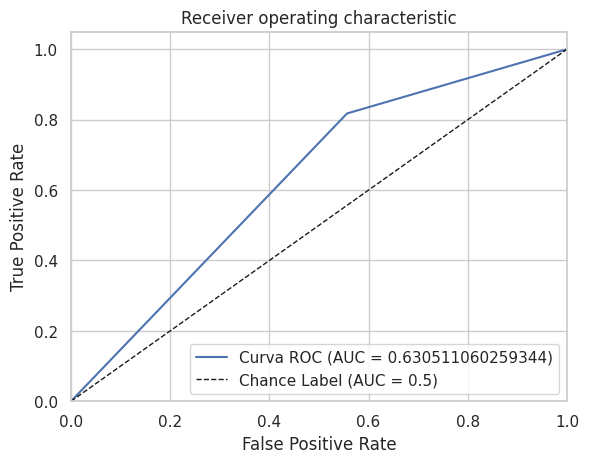

In [28]:
svc_model = grid_search_svc.best_estimator_
predictions_svc = svc_model.predict(X_test)
score_svc = accuracy_score(y_test ,predictions_svc)
medidas_svc = precision_recall_fscore_support(y_test, predictions_svc)
print(f"Accuracy de SVM: {score_svc}")
print(f"Precision de SVM: {medidas_svc[0]}")
print(f"Recall de SVM: {medidas_svc[1]}")
print(f"Fscore de SVM: {medidas_svc[2]}")
print(f"Support de SVM: {medidas_svc[3]}")
print_roc_curve(np.array(y_test), predictions_svc)

Accuracy de LR: 0.6349514563106796
Presition de LR: [0.61666667 0.64477612]
Recall de LR: [0.4826087  0.75789474]
Fscore de LR: [0.54146341 0.69677419]
Support de LR: [230 285]


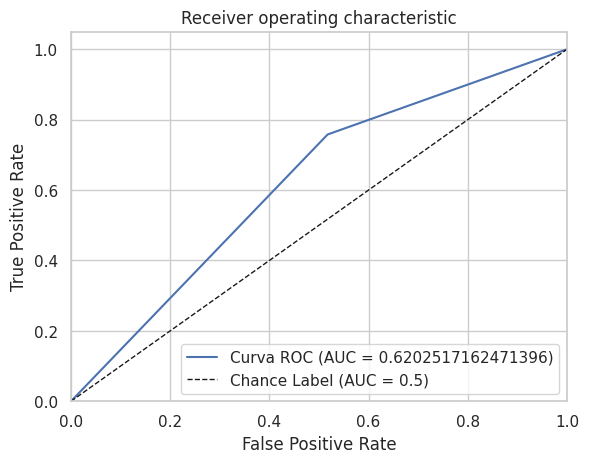

In [29]:
lr_model = grid_search_lr.best_estimator_
predictions_lr = lr_model.predict(X_test)
score_lr = accuracy_score(y_test ,predictions_lr)
medidas_lr = precision_recall_fscore_support(y_test, predictions_lr)
print(f"Accuracy de LR: {score_lr}")
print(f"Presition de LR: {medidas_lr[0]}")
print(f"Recall de LR: {medidas_lr[1]}")
print(f"Fscore de LR: {medidas_lr[2]}")
print(f"Support de LR: {medidas_lr[3]}")
print_roc_curve(list(y_test), predictions_lr)

En este caso buscaremos optimizar la Presicion para optimizar la cantidad de verdaderos encontrados que realmente son verdaderos, en este caso podemos ver que el SVM tiene mejor desempeño